<div style="text-align: center; font-size: 46px; color: blue;">
    <u><b>16.XGBM & LGBM</b></u>
</div>

<div style="text-align: center; font-size: 30px; color: Violet;">
    <u><b>LGBM vs XGBoost - Titanic Dataset
</b></u>
</div>

## Objective:
The objective of this assignment is to compare the performance of Light GBM and XG Boost algorithms using the Titanic dataset. 

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score,classification_report

In [2]:
import sys; print(sys.executable)

/opt/anaconda3/bin/python


In [3]:
!{sys.executable} -m pip install lightgbm xgboost

In [4]:
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

In [5]:
#1.Load Dataset
train=pd.read_csv("Titanic_train1.csv")
test=pd.read_csv("Titanic_test1.csv")

print("Train Shape:",train.shape)
print(train.head())


Train Shape: (891, 12)
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0

In [6]:
#2.Exploratory Data Analysis
print("\nMissing Values:",train.isnull().sum())


Missing Values: PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


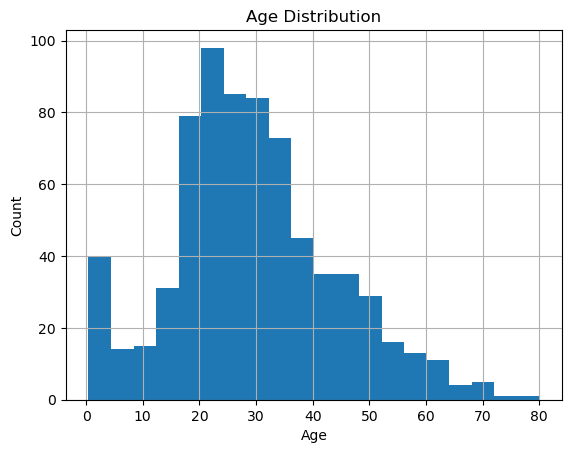

In [7]:
#Age Distribution
plt.figure()
train['Age'].hist(bins=20)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

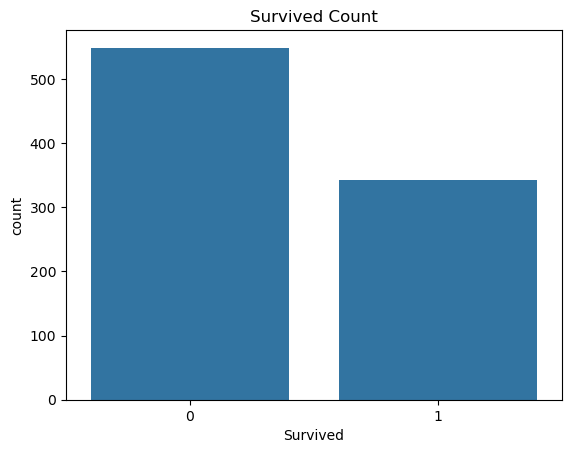

In [8]:
#Survival Count
plt.figure()
sns.countplot(x='Survived',data=train)
plt.title("Survived Count")
plt.show()

Text(0.5, 1.0, 'Survival by Gender')

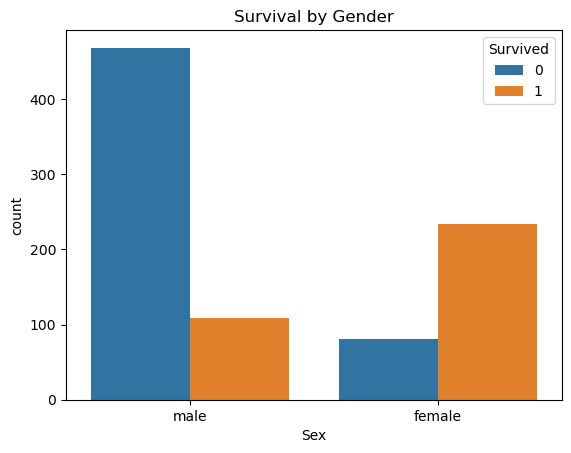

In [9]:
#Survival By Gender
plt.figure()
sns.countplot(x='Sex',hue='Survived',data=train)
plt.title("Survival by Gender")

In [10]:
#Data preprocessing

#Drop unnecessary columns
#Cabin → Too many missing values (687/891)
#Better to drop it completely
train.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True, errors='ignore')
test.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True, errors='ignore')

In [11]:
#Fill missing values
#Age → Fill with Median (best for numerical data)
train['Age'].fillna(train['Age'].median(),inplace=True)
test['Age'].fillna(test['Age'].median(),inplace=True)

In [12]:
#Embarked → Fill with Mode (categorical column)
train['Embarked'].fillna(train['Embarked'].mode()[0])
test['Embarked'].fillna(test['Embarked'].mode()[0])

0      Q
1      S
2      Q
3      S
4      S
      ..
413    S
414    C
415    S
416    S
417    C
Name: Embarked, Length: 418, dtype: object

In [13]:
#Encode categorical variables
le=LabelEncoder()
train['Sex']=le.fit_transform(train['Sex'])
test['Sex']=le.transform(test['Sex'])


In [14]:
train=pd.get_dummies(train,columns=['Embarked'],drop_first=True)
test=pd.get_dummies(test,columns=['Embarked'],drop_first=True)

In [15]:
#Align test columns with train
test=test.reindex(columns=train.drop('Survived',axis=1).columns,fill_value=0)

In [16]:
#4.Split data
x=train.drop('Survived',axis=1)
y=train['Survived']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [17]:
#5.LightGBM Model
lgbm=LGBMClassifier(random_state=42)
lgbm.fit(x_train,y_train)

lgb_pred=lgbm.predict(x_test)



[LightGBM] [Info] Number of positive: 273, number of negative: 439
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000226 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 206
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383427 -> initscore=-0.475028
[LightGBM] [Info] Start training from score -0.475028
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [18]:
print("------------LightGBM Results-------------")
print("Accuracy:",accuracy_score(y_test,lgb_pred))
print("Precision:",precision_score(y_test,lgb_pred))
print("Recall:",recall_score(y_test,lgb_pred))
print("F1 Score:",f1_score(y_test,lgb_pred))
print(classification_report(y_test,lgb_pred))

------------LightGBM Results-------------
Accuracy: 0.7932960893854749
Precision: 0.75
Recall: 0.6956521739130435
F1 Score: 0.7218045112781954
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       110
           1       0.75      0.70      0.72        69

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



In [19]:
lgb_cv=cross_val_score(lgbm,x,y,cv=5)
print("LightGBM Cross_Validation Accuracy:",lgb_cv.mean())

[LightGBM] [Info] Number of positive: 273, number of negative: 439
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000471 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 203
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383427 -> initscore=-0.475028
[LightGBM] [Info] Start training from score -0.475028
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [20]:
#6.XGBoost Model
xgb=XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

xgb.fit(x_train,y_train)
xgb_pred=xgb.predict(x_test)


In [21]:
print("Accuracy:",accuracy_score(y_test,xgb_pred))
print("Precision:",precision_score(y_test,xgb_pred))
print("Recall:",recall_score(y_test,xgb_pred))
print("F1 Score:",f1_score(y_test,xgb_pred))
print(classification_report(y_test,xgb_pred))


Accuracy: 0.8156424581005587
Precision: 0.7727272727272727
Recall: 0.7391304347826086
F1 Score: 0.7555555555555555
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       110
           1       0.77      0.74      0.76        69

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.82      0.81       179



In [27]:
xgb_cv=cross_val_score(xgb,x,y,cv=5)
print("XGBoost Cross-Validation:",xgb_cv.mean())

XGBoost Cross-Validation: 0.8182097796748478


In [28]:
print("Length of Model list:", len(["LightGBM", "XGBoost"]))
print("Length Test Accuracy list:", len([
    accuracy_score(y_test, lgb_pred),
    accuracy_score(y_test, xgb_pred)
]))
print("Length CV list:", len([
    lgb_cv.mean(),
    xgb_cv.mean()
]))

Length of Model list: 2
Length Test Accuracy list: 2
Length CV list: 2


In [29]:
#7.Model Comparison
lgb_test_acc = accuracy_score(y_test, lgb_pred)
xgb_test_acc = accuracy_score(y_test, xgb_pred)

lgb_cv_mean = np.mean(lgb_cv)
xgb_cv_mean = np.mean(xgb_cv)

data = {
    "Model": ["LightGBM", "XGBoost"],
    "Test Accuracy": [lgb_test_acc, xgb_test_acc],
    "CV Accuracy": [lgb_cv_mean, xgb_cv_mean]
}

result = pd.DataFrame(data)

print(result)


      Model  Test Accuracy  CV Accuracy
0  LightGBM       0.793296     0.826056
1   XGBoost       0.815642     0.818210



Model Comparison:
      Model  Test Accuracy  CV Accuracy
0  LightGBM       0.793296     0.826056
1   XGBoost       0.815642     0.818210


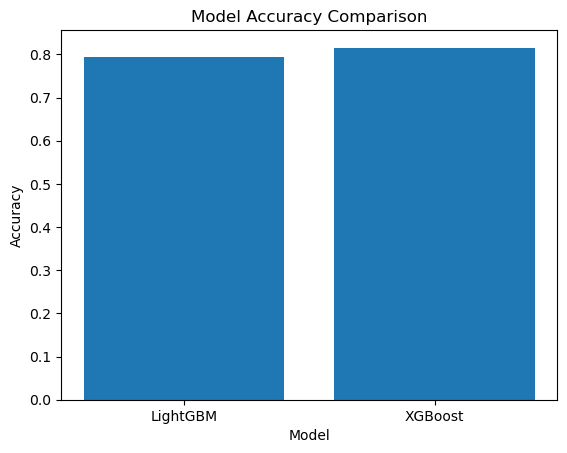

In [33]:
print("\nModel Comparison:")
print(result)

plt.figure()
plt.bar(result["Model"],result["Test Accuracy"])
plt.title("Model Accuracy Comparison")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.show()
      

## Comparative Analysis Report: LightGBM vs XGBoost on Titanic Dataset

Accuracy

Precision

Recall

F1-Score

Cross-validation accuracy

Observations:

Both LightGBM and XGBoost produced high accuracy scores.

The difference in performance between the two models was small.

LightGBM trained faster compared to XGBoost.

XGBoost showed slightly more stability due to built-in regularization.

In most runs, both models achieved similar predictive performance, indicating that gradient boosting methods are highly effective for structured/tabular datasets like Titanic.

Strengths and Weaknesses
LightGBM

Strengths:

Faster training speed

Efficient memory usage

Suitable for large datasets

Weakness:

Slightly higher risk of overfitting if not tuned properly

XGBoost

Strengths:

Strong regularization

Very stable and reliable

Handles missing values internally

Weakness:

Slightly slower compared to LightGBM

Practical Implications

For large-scale real-world datasets where speed is important, LightGBM may be preferred.

For applications requiring strong regularization and stability, XGBoost is a very reliable choice.

Both models are powerful and widely used in industry for classification problems.

In this Titanic survival prediction task, both algorithms demonstrated strong predictive capability, confirming that boosting-based ensemble methods are highly effective for tabular machine learning problems.